### Bank Customer Segmentation PCA and KMeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#### Load the data in pandas DataFrame from csv 

In [2]:
df = pd.read_csv('../data/bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


#### The data Cleaning Process 

In [3]:
df.sample(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
19879,T19880,C1773275,1/1/1800,M,DEHRADUN,8114.96,26/9/16,154309,305.75
917503,T917504,C3640426,23/8/92,F,UDAIPUR,12884.18,12/9/16,205249,275.00
654880,T654881,C5828256,4/5/86,M,GURGAON,47.07,28/8/16,215917,597.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [6]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [7]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

<Axes: >

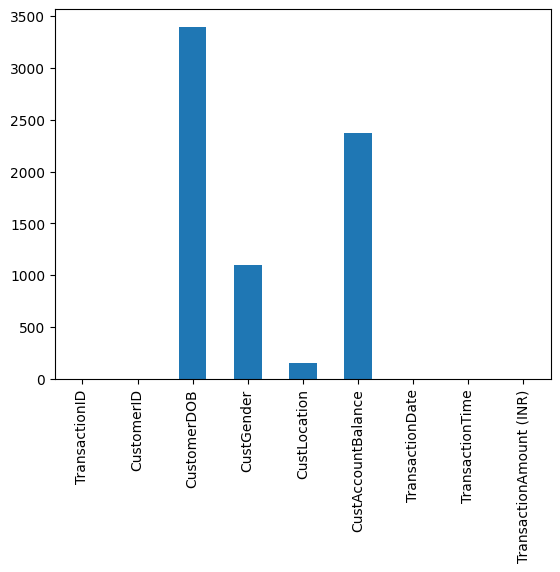

In [8]:
df.isnull().sum().plot(kind='bar')

In [9]:
df1 = df.copy()
df1.head(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [10]:
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])
df1['CustomerDOB'] = pd.to_datetime(df1['CustomerDOB'])

In [11]:
df1.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [12]:
from datetime import datetime

current_year = datetime.today().year
df1['Age'] = current_year - df1['CustomerDOB'].dt.year
df1.sample(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
921037,T921038,C1928059,1990-06-03,M,BANGALORE,4125.33,2016-12-09,235642,50.0,34.0
123733,T123734,C5637343,2059-07-20,F,GURGAON,298639.61,2016-06-08,173058,5750.0,-35.0
51974,T51975,C2927234,1991-09-25,M,KALYANI NAGAR PUNE,116.83,2016-03-08,161620,100.0,33.0
256217,T256218,C1829286,1989-07-15,M,GURGAON,369.07,2016-12-08,115724,600.0,35.0
377221,T377222,C2812374,2072-01-12,F,CHANDIGARH,55014.02,2016-08-13,121116,1700.0,-48.0


In [13]:
df1.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
Age                               float64
dtype: object

In [14]:
negative_age = (df1['Age'] < 0 ).sum()
print('The neagtive age found in the dataset is:', negative_age)
print('The min age found in the dataset is:', df1['Age'].min())
print('The max age found in the dataset is:', df1['Age'].max())

The neagtive age found in the dataset is: 94229
The min age found in the dataset is: -49.0
The max age found in the dataset is: 224.0


In [15]:
df2 = df1[df1['Age'].between(18, 100)]
df2.sample(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
412102,T412103,C3226966,1988-06-15,M,BANGALORE,7244.83,2016-08-18,204826,117.0,36.0
990231,T990232,C2810936,1997-01-28,F,CHANDIGARH,98391.24,2016-09-15,215536,2000.0,27.0
75697,T75698,C4511445,1991-11-18,F,GURGAON,17396.93,2016-02-08,184741,80.0,33.0
799992,T799993,C6468080,1989-11-15,M,NEW DELHI,59.36,2016-05-09,174713,585.0,35.0
345723,T345724,C2141283,1986-10-22,M,THRISSUR,18854.47,2016-08-14,135257,9302.0,38.0


In [16]:
df1.shape, df2.shape

((1048567, 10), (893367, 10))

In [17]:
print('The removed rows with the age that are not between the 80 and 100 :', df1.shape[0] - df2.shape[0])

The removed rows with the age that are not between the 80 and 100 : 155200


<Axes: >

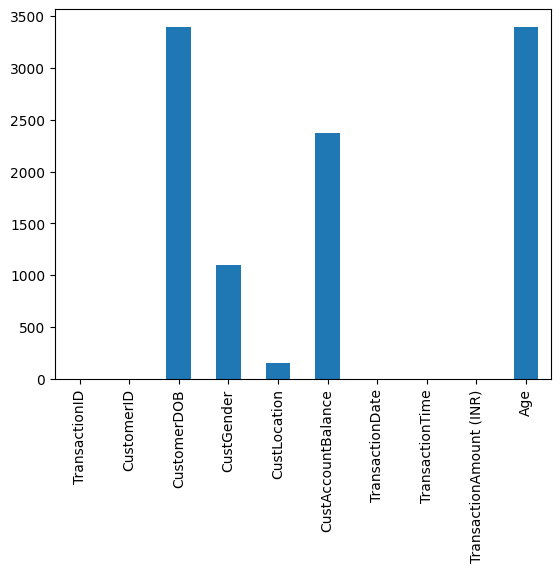

In [18]:
df1.isnull().sum().plot(kind='bar')

<Axes: >

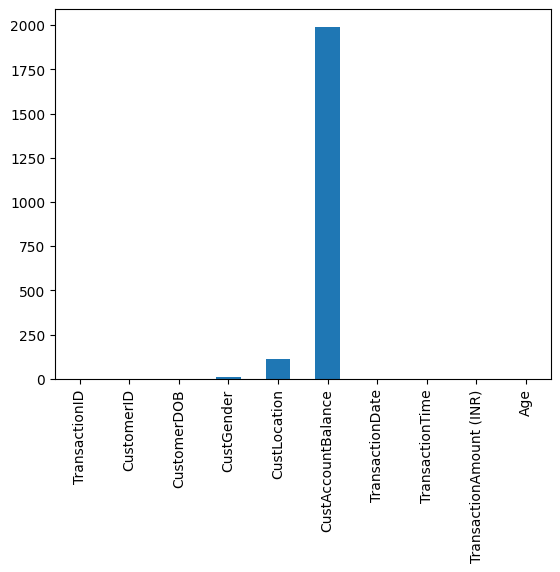

In [19]:
df2.isna().sum().plot(kind='bar')

In [20]:
df3 = df2.dropna()
df3.sample(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
259271,T259272,C7734668,1977-04-02,F,NOIDA,377051.20,2016-12-08,183540,315.71,47.0
707426,T707427,C9012030,1986-07-26,M,NOIDA,87564.75,2016-03-09,103530,1000.00,38.0
202573,T202574,C7130052,1983-03-09,F,HYDERABAD,57193.10,2016-08-08,120411,7412.24,41.0
546054,T546055,C3427762,1984-07-29,M,MUMBAI,668.95,2016-08-23,201923,2101.00,40.0
230911,T230912,C5114430,1992-05-19,M,VIJAYAWADA,134614.90,2016-07-08,125549,48.00,32.0


In [21]:
print('The number of rows that are have Nan values:', df2.shape[0] - df3.shape[0])

The number of rows that are have Nan values: 2114


In [22]:
df3.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [23]:
print('The number of duplicated rows : ', df3['TransactionID'].duplicated().sum())

The number of duplicated rows :  0


In [24]:
print('The number of people who have more than one transaction : ', df3['CustomerID'].duplicated().sum())

The number of people who have more than one transaction :  121265


In [25]:
df4 = df3.drop_duplicates(subset=['TransactionID'])
df4.sample(5)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
222830,T222831,C5536343,1995-07-01,M,MUMBAI,1.23,2016-08-08,223721,100.0,29.0
431952,T431953,C7715980,1988-06-27,F,MUMBAI AIROLI THANE,24809.65,2016-08-17,202529,1199.0,36.0
368974,T368975,C2013123,1990-01-09,F,HOWRAH,220039.22,2016-08-14,151252,1050.0,34.0
898001,T898002,C8835423,1984-01-07,M,SONEPAT,15510.65,2016-07-09,113521,1000.0,40.0
117332,T117333,C4333843,1993-08-15,M,PANIPAT,3.45,2016-06-08,165139,74.0,31.0


In [26]:
df5 = df4.drop(columns=['TransactionID', 'CustomerID', 'CustomerDOB'])
df5.sample(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
267684,F,DELHI,13148.26,2016-03-09,120132,438.52,27.0
371081,M,NOIDA,153852.26,2016-08-13,123403,660.00,41.0
441605,M,LUCKNOW,45135.53,2016-08-16,143431,213.00,31.0
666714,M,MOGA,208927.89,2016-08-31,105528,297.00,32.0
480764,M,CHENNAI,512075.07,2016-08-21,201944,600.00,34.0


In [27]:
df5['Age'] = df5['Age'].astype(int)

In [28]:
df5.sample(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
406256,F,KOLKATA,10649.16,2016-08-18,151656,851.25,35
71412,M,GURGAON,331.51,2016-02-08,165001,95.00,32
47957,M,HYDERABAD,13752.24,2016-03-08,145127,750.00,47
274879,M,DELHI,221.34,2016-11-08,85150,90.00,35
72479,F,MUMBAI,122947.56,2016-02-08,165833,2517.66,44


In [29]:
df5.describe(include='object')  

,CustGender,CustLocation
count,891253,891253
unique,2,7574
top,M,MUMBAI
freq,644265,87864


In [30]:
print('The number of the transaction donne by Male individuals : ', (df5['CustGender'] == 'M').sum())
print('The number of the transaction donne by Female individuals : ', (df5['CustGender'] == 'F').sum())

The number of the transaction donne by Male individuals :  644265
The number of the transaction donne by Female individuals :  246988


##### The are clear imbalance from in the data because the most transcation are donne by male individuals 

In [31]:
df5.CustGender.value_counts(normalize=True) * 100

CustGender
M    72.287555
F    27.712445
Name: proportion, dtype: float64

In [32]:
localication_value_count = df['CustLocation'].value_counts()
localication_value_count_df = localication_value_count.reset_index()
localication_value_count_df.rename(columns={'count' : 'ValueCounts'}, inplace=True)
localication_value_count_df

,CustLocation,ValueCounts
0,MUMBAI,103595
1,NEW DELHI,84928
2,BANGALORE,81555
3,GURGAON,73818
4,DELHI,71019
...,...,...
9350,SAHIBGANJ,1
9351,24 PARGANAS SOUTH 24 PARGANAS,1
9352,PREMISES KALYANI NAGAR PUNE,1
9353,ARRAH,1


In [33]:
localication_value_count_df.dtypes

CustLocation    object
ValueCounts      int64
dtype: object

In [34]:
localions = localication_value_count_df[localication_value_count_df.ValueCounts.between(
    1000, localication_value_count_df['ValueCounts'].max()
)]

In [35]:
locations = list(localions['CustLocation'])

In [36]:
print("The locations that have more then 1000 Transications : ", locations)

The locations that have more then 1000 Transications :  ['MUMBAI', 'NEW DELHI', 'BANGALORE', 'GURGAON', 'DELHI', 'NOIDA', 'CHENNAI', 'PUNE', 'HYDERABAD', 'THANE', 'KOLKATA', 'GHAZIABAD', 'NAVI MUMBAI', 'AHMEDABAD', 'FARIDABAD', 'JAIPUR', 'CHANDIGARH', 'LUCKNOW', 'MOHALI', 'SURAT', 'NASHIK', 'LUDHIANA', 'VISAKHAPATNAM', 'DEHRADUN', 'INDORE', 'VADODARA', 'AMRITSAR', 'AGRA', 'NAGPUR', 'COIMBATORE', 'KANPUR', 'MEERUT', 'PANCHKULA', 'AURANGABAD', 'GREATER NOIDA', 'GUWAHATI', 'GUNTUR', 'JALANDHAR', 'RANGA REDDY', 'BHOPAL', 'UDAIPUR', 'PATNA', 'RANCHI', 'ERNAKULAM', 'REWARI', 'BENGALURU', 'PATIALA', 'SECUNDERABAD', 'HOWRAH', 'PANIPAT', 'ALWAR', 'ALLAHABAD', 'SONIPAT', 'NORTH 24 PARGANAS', 'ZIRAKPUR', 'RAJKOT', 'RAIPUR', 'BAMBOLIM', 'KOLHAPUR', 'SILIGURI', 'MANGALORE', 'BAREILLY', 'JAMSHEDPUR', 'ALIGARH', 'KARNAL', 'HOSUR', 'KANGRA', 'SAHARANPUR', 'JODHPUR', 'WARANGAL', 'MORADABAD', 'KHARAR', 'KOTTAYAM', 'AMBALA', 'VAPI', 'BHUBANESHWAR', 'BHIWADI', 'KOTA', 'JAMMU', 'SAS NAGAR', 'VARANASI', 'SA

In [37]:
df6 = df5[df5['CustLocation'].isin(locations)]
df6.shape, df5.shape

((693684, 7), (891253, 7))

In [38]:
df6.sample(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
275199,M,GURGAON,10789.66,2016-12-08,205122,4500.0,38
350140,M,MUMBAI,24897.36,2016-08-14,54100,100.0,43
470041,F,GURGAON,10886.27,2016-08-21,172715,246.0,34
225341,M,NEW DELHI,9820.95,2016-08-08,222529,50.0,33
343773,M,AMRITSAR,99453.33,2016-08-15,210654,200.0,50


In [39]:
df6.rename(columns={'TransactionAmount (INR)' : 'TransactionAmount'}, inplace=True)

#### Exploratory Data Analysis (EDA) 

In [40]:
df6.groupby('CustGender')[['CustAccountBalance', 'TransactionAmount']].agg(['min', 'max', 'mean'])  

CustAccountBalance                            TransactionAmount  \
                          min          max          mean               min   
CustGender                                                                   
F                         0.0  12343905.63  80274.581892               0.0   
M                         0.0  43165555.53  87903.841164               0.0   

                                     
                   max         mean  
CustGender                           
F           1380002.88  1505.982499  
M           1560034.99  1240.742579

In [41]:
df6.groupby('Age')[['CustAccountBalance', 'TransactionAmount']].agg(['min', 'max', 'mean'])

CustAccountBalance                             TransactionAmount  \
                   min          max           mean               min   
Age                                                                    
18                4.14    116515.21   53770.931500              25.0   
19             1002.83    378325.52   70839.980345              25.0   
20                0.00     71139.38   11756.752667              10.0   
21                4.66    155681.56   30269.816000              85.0   
22               29.43    247140.63   28863.190303               0.0   
23                5.37    278337.10   15894.565172               0.0   
24               63.96    413680.87   38098.077047               1.0   
25               15.76    424880.72   27300.189204               1.0   
26                0.44  10268800.62   30869.279274               0.0   
27                0.00   2089425.75   32927.597698               0.0   
28                0.00   2249370.54   34859.092582               0.0   
29                0.00   3135444.31   29492.485357               0.0   
30                0.00   1497456.64   25296.252334               0.0   
31                0.00   6903931.76   34564.744225               0.0   
32                0.00   6153347.84   44244.764769               0.0   
33                0.00  16834937.99   44846.598882               0.0   
34                0.00   6464804.71   48670.021429               0.0   
35                0.00   9198576.98   73109.632111               0.0   
36                0.00  24383340.38   69393.562452               0.0   
37                0.00  14276260.10   85123.824364               0.0   
38                0.00  12343905.63   88619.970266               0.0   
39                0.00   9475590.98   86884.075430               0.0   
40                0.00  15715987.76  109022.458877               0.0   
41                0.00  15436498.08   99442.755238               0.0   
42                0.00   9141893.63  113844.135888               0.0   
43                0.00  43165555.53  142317.870227               0.0   
44                0.00  10336819.09  161382.379200               0.0   
45                0.00  10546545.67  147102.333756               0.0   
46                0.00  14472840.56  166843.685228               0.0   
47                0.00  10514477.12  175795.214703               0.0   
48                0.00  12744388.47  192283.193536               0.0   
49                0.00  15158474.07  216220.445327               0.0   
50                0.00  36090853.96  280146.825467               0.0   

                              
            max         mean  
Age                           
18      5787.69  2479.379500  
19     28750.00  3037.889655  
20     11696.00  1432.757556  
21     10906.00  1952.528667  
22     26964.00  2570.802273  
23     51350.00  1653.650690  
24      8309.00   961.733109  
25    100742.00  1376.477820  
26     56368.23  1377.031364  
27    200001.24   950.344846  
28     63826.00   827.641859  
29     93500.00   747.694260  
30    158134.00   781.204672  
31    350000.00   957.698044  
32    310002.83   886.391564  
33    108700.74   960.573293  
34    150000.00  1052.904013  
35    600003.45  1143.402916  
36    600008.32  1249.139660  
37    314694.08  1292.689235  
38    270007.68  1381.209611  
39    720001.16  1464.507705  
40    168192.00  1617.121182  
41    561001.00  1594.632261  
42    278800.18  1648.949870  
43    525003.83  1655.362897  
44    198600.81  1787.242462  
45    378006.07  2006.291190  
46   1380002.88  1870.558606  
47    514320.00  2033.927774  
48   1560034.99  2177.641823  
49    200000.00  1981.593976  
50    299009.96  2406.918905

In [42]:
df7 = df6.copy()
df7['UtilizationRatio'] = df7['TransactionAmount'] / df7['CustAccountBalance']
df7.sample(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,UtilizationRatio
485014,F,GURGAON,636.43,2016-08-20,105108,10154.0,35,15.954622
295078,F,ALLAHABAD,10722.87,2016-11-08,200331,510.0,36,0.047562
211662,M,NEW DELHI,35019.79,2016-08-08,160151,717.0,36,0.020474
697848,F,GHAZIABAD,8.39,2016-08-30,110743,59.0,34,7.032181
628342,M,MUMBAI,22929.02,2016-08-29,195704,341.4,43,0.014889


In [43]:
df7['UtilizationRatio'] = (df7['UtilizationRatio'] * 100).round(3)
df7.sample(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,UtilizationRatio
446739,M,BANGALORE,523.86,2016-08-16,175949,644.00,33,122.934
391757,F,AHMEDABAD,68967.85,2016-08-13,192637,7360.00,40,10.672
168396,M,GURGAON,660408.17,2016-04-08,155017,1775.74,43,0.269
691620,M,MUMBAI,1473749.77,2016-08-30,174921,88.49,49,0.006
716978,F,JAIPUR,62531.11,2016-03-09,202918,275.00,32,0.440


In [44]:
print('The number of the people that did transaction more then the account balance : ', 
      (df7['TransactionAmount'] > df7['CustAccountBalance']).sum())
print('So there are two possible reasons for this case :')
print('     1. Those people have taken the loan from the bank')
print('     2. The data is not correct')

The number of the people that did transaction more then the account balance :  66929
So there are two possible reasons for this case :
     1. Those people have taken the loan from the bank
     2. The data is not correct


In [45]:
df8 = df7[~(df7.TransactionAmount > df7.CustAccountBalance)]

In [46]:
df8.shape, df7.shape

((626755, 8), (693684, 8))

In [47]:
df8.groupby('CustGender')[['UtilizationRatio']].agg(['min', 'max', 'mean'])

UtilizationRatio                 
                        min    max      mean
CustGender                                  
F                       0.0  100.0  7.464018
M                       0.0  100.0  7.815302

In [48]:
df8.groupby('Age')[['UtilizationRatio']].agg(['min', 'max', 'mean'])

UtilizationRatio                    
                 min      max       mean
Age                                     
18             0.045   20.432   5.026357
19             0.046   91.479  19.592741
20             0.032   96.991  21.271562
21             0.527   77.104  29.774739
22             0.000   82.221  13.501020
23             0.000   80.819  15.319085
24             0.006   89.694  13.489763
25             0.005   99.174  10.761397
26             0.000   98.436   7.404054
27             0.000   99.941   9.899045
28             0.000   98.912   8.800374
29             0.000   99.870   9.023652
30             0.000  100.000   8.890049
31             0.000   99.974   8.255539
32             0.000   99.980   8.327531
33             0.000   99.829   7.849547
34             0.000   99.949   7.925812
35             0.000  100.000   7.810974
36             0.000   99.917   7.661856
37             0.000   99.862   7.438932
38             0.000  100.000   7.221039
39             0.000  100.000   7.170124
40             0.000   99.924   7.512591
41             0.000   99.758   7.566215
42             0.000   99.857   7.212663
43             0.000  100.000   6.811971
44             0.000   99.959   7.471854
45             0.000   99.796   7.849707
46             0.000   99.755   7.192140
47             0.000   99.820   6.974095
48             0.000   99.975   6.800422
49             0.000   99.933   6.887666
50             0.000   99.834   7.356139

**Insights From the Data** :
    
    1. The `UtilizationRatio` ranges from a minimum of 0.00 to maximum of 100 across differents ages which indicates that some individuals fully utilized the available recoures.

    2. Younger individuals between the 18-22 tend to have higher mean utilization ratios compered to older individuals, for example the mean utilization ratio for the age 21 is `29.774739` in compred to age 51 whcih is `7.356139`.
    
    3. Ages 20 and 21 have the high mean utilization mean, and the ages between the 38 and 50 have the lower utilization mean.


#### The Data Visualization 

In [49]:
df8.columns, df8.dtypes

(Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate',
        'TransactionTime', 'TransactionAmount', 'Age', 'UtilizationRatio'],
       dtype='object'),
 CustGender                    object
 CustLocation                  object
 CustAccountBalance           float64
 TransactionDate       datetime64[ns]
 TransactionTime                int64
 TransactionAmount            float64
 Age                            int64
 UtilizationRatio             float64
 dtype: object)

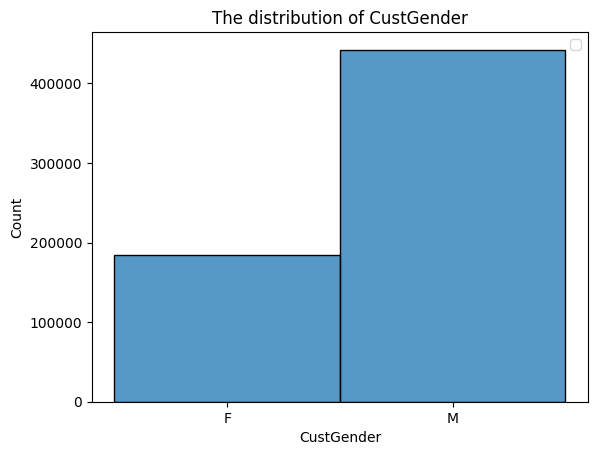

In [50]:
sns.histplot(data=df8, x='CustGender', bins=2, kde=False)
plt.title('The distribution of CustGender')
plt.legend()

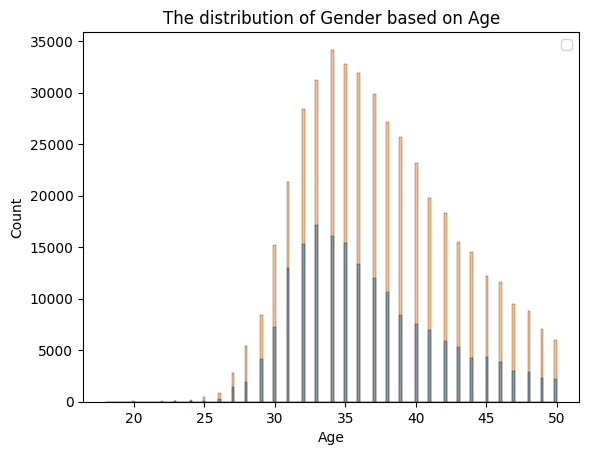

In [51]:
sns.histplot(data=df8, x='Age', hue='CustGender', kde=False)
plt.title('The distribution of Gender based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

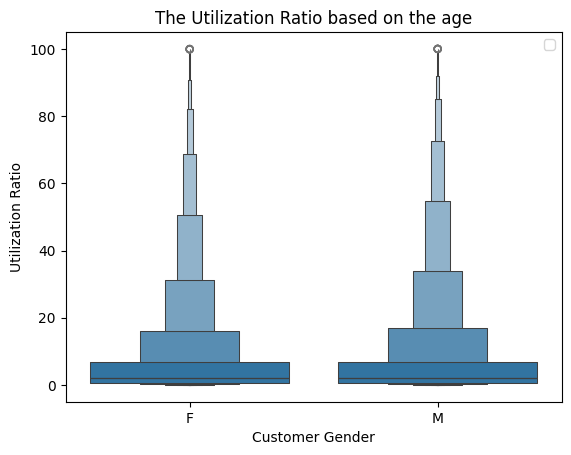

In [52]:
sns.boxenplot(data=df8, x='CustGender', y='UtilizationRatio')
plt.title('The Utilization Ratio based on the age')
plt.xlabel('Customer Gender')
plt.ylabel('Utilization Ratio')
plt.legend()

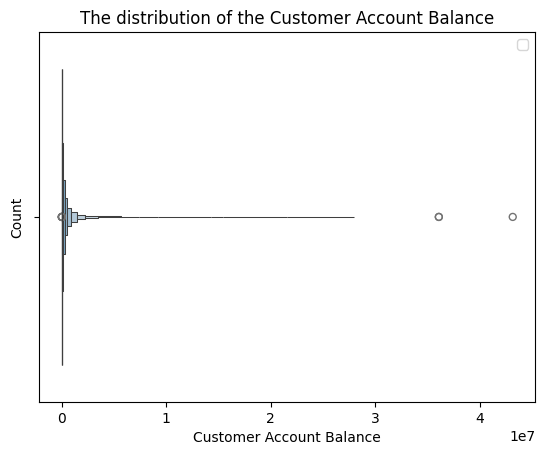

In [53]:
sns.boxenplot(data=df8, x='CustAccountBalance')
plt.title('The distribution of the Customer Account Balance')
plt.xlabel('Customer Account Balance')
plt.ylabel('Count')
plt.legend()

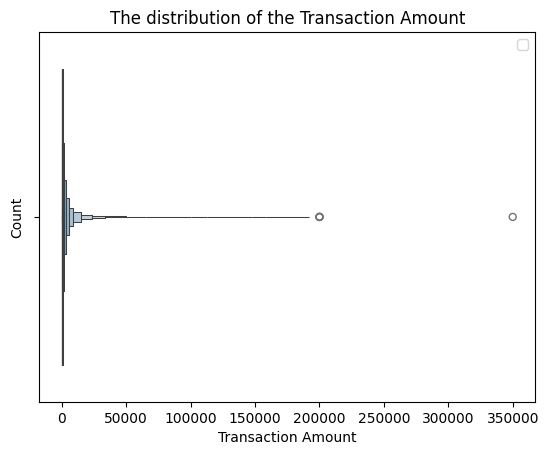

In [54]:
sns.boxenplot(data=df8, x='TransactionAmount')
plt.title('The distribution of the Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend()

In [55]:
df9 = df8.copy()
df9['TransactionMonth'] = df8['TransactionDate'].dt.month
df9.sample(4)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,UtilizationRatio,TransactionMonth
3691,M,HYDERABAD,433651.13,2016-10-21,152539,767.0,41,0.177,10
74879,M,NEW DELHI,24362.58,2016-02-08,193106,500.0,30,2.052,2
846522,F,NEW DELHI,4778.71,2016-09-09,74600,399.0,37,8.350,9
866959,M,BANGALORE,13384.54,2016-08-09,144323,205.0,36,1.532,8


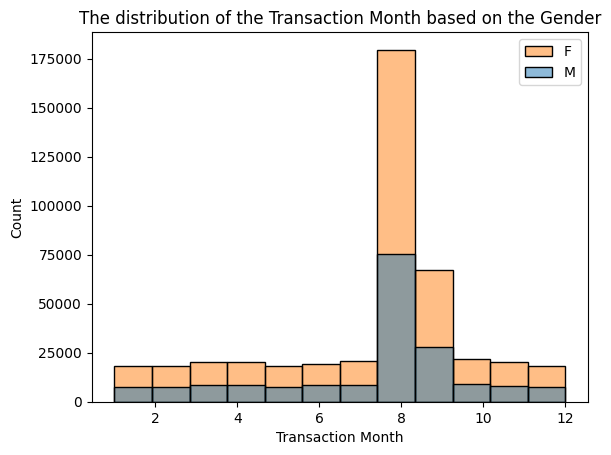

In [56]:
sns.histplot(data=df9, x='TransactionMonth', hue='CustGender', bins=12, kde=False)
plt.title('The distribution of the Transaction Month based on the Gender')
plt.xlabel('Transaction Month')
plt.ylabel('Count')
plt.legend(['F', 'M'])
plt.show()

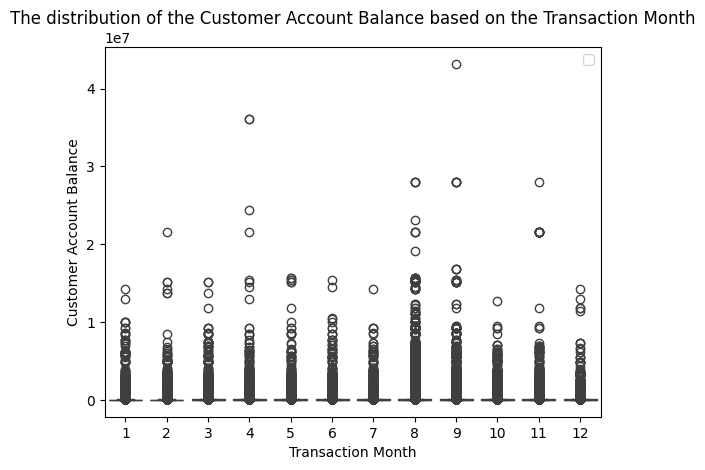

In [57]:
sns.boxplot(data=df9, x='TransactionMonth', y='CustAccountBalance')
plt.title('The distribution of the Customer Account Balance based on the Transaction Month')
plt.xlabel('Transaction Month')
plt.ylabel('Customer Account Balance')
plt.legend()
plt.show()

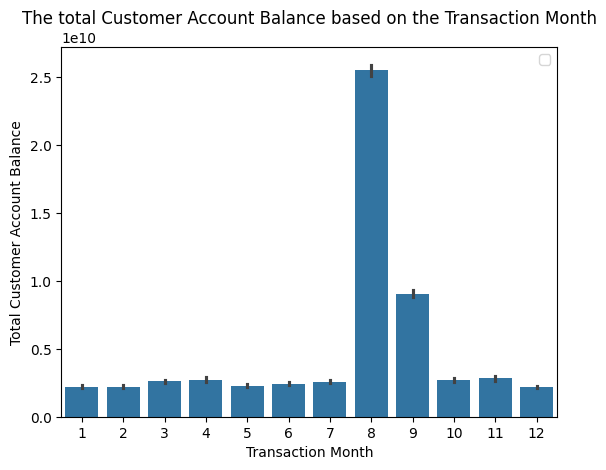

In [58]:
sns.barplot(data=df9, x='TransactionMonth', y='CustAccountBalance', estimator=sum)
plt.title('The total Customer Account Balance based on the Transaction Month')
plt.xlabel('Transaction Month')
plt.ylabel('Total Customer Account Balance')
plt.legend()
plt.show()

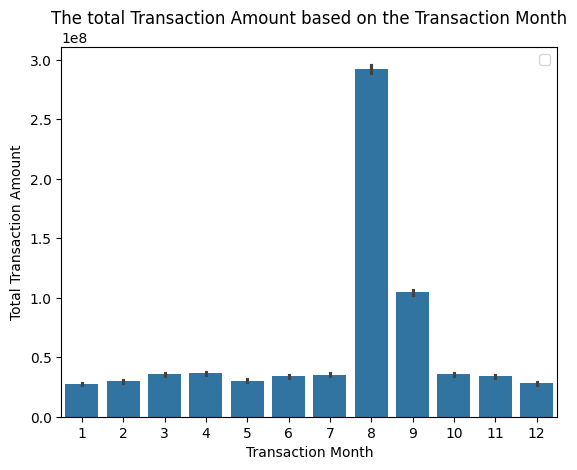

In [59]:
sns.barplot(data=df9, x='TransactionMonth', y='TransactionAmount', estimator=sum)
plt.title('The total Transaction Amount based on the Transaction Month')
plt.xlabel('Transaction Month')
plt.ylabel('Total Transaction Amount')
plt.legend() 
plt.show()

In [60]:
num_cols = df9[['CustAccountBalance', 'TransactionAmount', 'UtilizationRatio', 'Age', 'TransactionMonth']]  
corr_matirx = num_cols.corr()
corr_matirx  

,CustAccountBalance,TransactionAmount,UtilizationRatio,Age,TransactionMonth
CustAccountBalance,1.000000,0.114377,-0.099817,0.125857,0.005534
TransactionAmount,0.114377,1.000000,0.206068,0.096474,-0.003890
UtilizationRatio,-0.099817,0.206068,1.000000,-0.030695,-0.012083
Age,0.125857,0.096474,-0.030695,1.000000,-0.002648
TransactionMonth,0.005534,-0.003890,-0.012083,-0.002648,1.000000


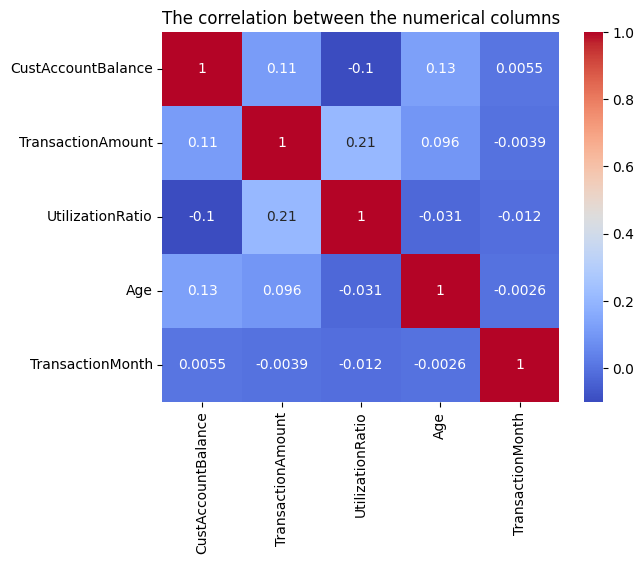

In [61]:
sns.heatmap(corr_matirx, annot=True, cmap='coolwarm')
plt.title('The correlation between the numerical columns')
plt.show()

#### Label Encoding 

In [62]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df9['CustGender'] = encoder.fit_transform(df9['CustGender'])
df9.sample(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,UtilizationRatio,TransactionMonth
30883,1,MUMBAI,35329.97,2016-09-25,194123,620.00,47,1.755,9
534337,1,NEW DELHI,40231.32,2016-08-23,200846,819.00,31,2.036,8
264738,0,BANGALORE,712897.80,2016-12-08,195912,238.00,35,0.033,12
446822,1,DELHI,25789.84,2016-08-16,140819,513.61,33,1.992,8
213518,1,GURGAON,164943.90,2016-08-08,82721,46.00,31,0.028,8


In [63]:
dumies = pd.get_dummies(df9['CustLocation'])
dumies.sample(5)

,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,ALWAR,AMBALA,AMRITSAR,AURANGABAD,BAMBOLIM,BANGALORE,...,TRIVANDRUM,UDAIPUR,VADODARA,VAPI,VARANASI,VELLORE,VIJAYAWADA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
816978,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
263334,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
120312,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80294,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
993370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
dumies = dumies.astype(int)
dumies.sample(5)

,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,ALWAR,AMBALA,AMRITSAR,AURANGABAD,BAMBOLIM,BANGALORE,...,TRIVANDRUM,UDAIPUR,VADODARA,VAPI,VARANASI,VELLORE,VIJAYAWADA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
277172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df10 = df9.copy()
df10 = df10.merge(dumies, left_index=True, right_index=True)  
df10.sample(5)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,UtilizationRatio,TransactionMonth,AGRA,...,TRIVANDRUM,UDAIPUR,VADODARA,VAPI,VARANASI,VELLORE,VIJAYAWADA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
27826,1,BENGALURU,22765.22,2016-09-26,122014,21800.0,33,95.760,9,0,...,0,0,0,0,0,0,0,0,0,0
189417,0,DELHI,3495.99,2016-09-08,184039,35.0,28,1.001,9,0,...,0,0,0,0,0,0,0,0,0,0
740931,1,DELHI,2688.68,2016-02-09,185720,440.0,33,16.365,2,0,...,0,0,0,0,0,0,0,0,0,0
523051,1,FARIDABAD,5851.89,2016-08-24,125914,4998.0,39,85.408,8,0,...,0,0,0,0,0,0,0,0,0,0
915801,0,NEW DELHI,25006.00,2016-12-09,82130,190.0,35,0.760,12,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df10.describe()

,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,UtilizationRatio,TransactionMonth,AGRA,AHMEDABAD,...,TRIVANDRUM,UDAIPUR,VADODARA,VAPI,VARANASI,VELLORE,VIJAYAWADA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
count,626755.000000,6.267550e+05,626755,626755.000000,626755.000000,626755.000000,626755.000000,626755.000000,626755.000000,626755.000000,...,626755.000000,626755.000000,626755.000000,626755.000000,626755.000000,626755.000000,626755.000000,626755.000000,626755.000000,626755.000000
mean,0.705547,9.474863e+04,2016-07-25 10:18:25.178259456,157956.883066,1154.513454,37.199314,7.711865,7.341823,0.004282,0.015015,...,0.001166,0.003122,0.004399,0.001694,0.001503,0.001315,0.001308,0.004879,0.001817,0.002192
min,0.000000,2.000000e-02,2016-01-08 00:00:00,0.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.337260e+03,2016-06-09 00:00:00,124651.000000,151.000000,33.000000,0.567000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.982875e+04,2016-08-20 00:00:00,165255.000000,400.000000,36.000000,1.986000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.974317e+04,2016-09-09 00:00:00,200553.000000,1000.000000,41.000000,6.839000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.316556e+07,2016-12-09 00:00:00,235959.000000,350000.000000,50.000000,100.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.455797,4.102065e+05,NaN,51647.241353,3555.595095,5.333023,15.025776,2.635879,0.065300,0.121614,...,0.034132,0.055791,0.066178,0.041129,0.038739,0.036235,0.036147,0.069680,0.042591,0.046770


In [67]:
df10.drop(columns=['CustLocation'], axis=1, inplace=True)
df10.sample(5)

,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,UtilizationRatio,TransactionMonth,AGRA,AHMEDABAD,...,TRIVANDRUM,UDAIPUR,VADODARA,VAPI,VARANASI,VELLORE,VIJAYAWADA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
707052,1,34177.61,2016-08-31,161320,700.0,34,2.048,8,0,0,...,0,0,0,0,0,0,0,0,0,0
670688,1,14043.15,2016-08-28,180103,679.0,45,4.835,8,0,0,...,0,0,1,0,0,0,0,0,0,0
636476,0,26412.44,2016-08-25,213716,840.0,41,3.180,8,0,0,...,0,0,0,0,0,0,0,0,0,0
694573,1,13239.55,2016-08-31,230153,6000.0,45,45.319,8,0,0,...,0,0,0,0,0,0,0,0,0,0
384898,0,19929.93,2016-08-13,183958,2425.0,30,12.168,8,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Dimensionality Reduction

The explained variance ratio of the PCA1 :  0.9843235680460081
The explained variance ratio of the PCA2 :  0.015603480096917142


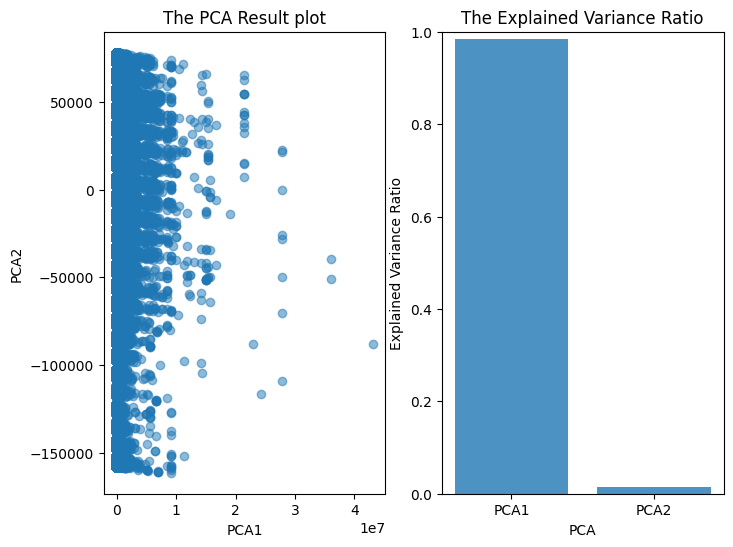

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_df = df10.select_dtypes(include=[np.number])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_df)
df_pca = pd.DataFrame(data=pca_result, columns=['pca1', 'pca2'])

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_pca['pca1'], df_pca['pca2'], alpha=0.5)
plt.title('The PCA Result plot')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(1, 2, 2)
plt.bar(['PCA1', 'PCA2'], explained_variance, alpha=0.8)
plt.title('The Explained Variance Ratio')
plt.xlabel('PCA')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, 1)

print('The explained variance ratio of the PCA1 : ', explained_variance[0])
print('The explained variance ratio of the PCA2 : ', explained_variance[1])

In [69]:
from scipy import stats

male_customers = df10[df10['CustGender'] == 0]['CustAccountBalance']
female_customers = df10[df10['CustGender'] == 1]['CustAccountBalance']
t_stat, p_value = stats.ttest_ind(male_customers, female_customers)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average CustAccountBalance between male and female customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average CustAccountBalance between male and female customers.")


T-statistic: -9.455194908671286
P-value: 3.2347310816460033e-21
Reject the null hypothesis: There is a significant difference in average CustAccountBalance between male and female customers.


In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

anov_data = df10[['CustAccountBalance', 'Age']]

model = ols('CustAccountBalance ~ C(Age)', data=anov_data).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,8.117172e+10,1.0,0.490828,0.483558
C(Age),1.818046e+15,32.0,343.541671,0.000000
Residual,1.036455e+17,626722.0,NaN,NaN


In [71]:
alpha = 0.05 
p_value = anova_table['PR(>F)'][1]
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average CustAccountBalance across Age Groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average CustAccountBalance across Age Groups.")

Reject the null hypothesis: There is a significant difference in average CustAccountBalance across Age Groups.


In [72]:
anova_data_1 = df10[['TransactionAmount', 'Age']]

# Perform ANOVA
model = ols('TransactionAmount ~ C(Age)', data=anova_data_1).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

print(anova_table)

                 sum_sq        df           F   PR(>F)
Intercept  5.944703e+07       1.0    4.748135  0.02933
C(Age)     7.697416e+10      32.0  192.126752  0.00000
Residual   7.846611e+12  626722.0         NaN      NaN


In [73]:
alpha = 0.05 
p_value = anova_table['PR(>F)'][1]
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average TransactionAmount across Age Groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average TransactionAmount across Age Groups.")

Reject the null hypothesis: There is a significant difference in average TransactionAmount across Age Groups.


#### Train and test the Kmeans models on the dataFrame 

In [74]:
df9

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,UtilizationRatio,TransactionMonth
0,0,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,30,0.140,2
2,0,MUMBAI,17874.44,2016-02-08,142712,459.0,28,2.568,2
4,0,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,36,26.249,2
6,0,MUMBAI,973.46,2016-02-08,173806,566.0,32,58.143,2
7,1,MUMBAI,95075.54,2016-02-08,170537,148.0,42,0.156,2
...,...,...,...,...,...,...,...,...,...
1048562,1,NEW DELHI,7635.19,2016-09-18,184824,799.0,34,10.465,9
1048563,1,NASHIK,27311.42,2016-09-18,183734,460.0,32,1.684,9
1048564,1,HYDERABAD,221757.06,2016-09-18,183313,770.0,35,0.347,9
1048565,1,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,46,9.884,9


In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [76]:
df9.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount', 'Age', 'UtilizationRatio',
       'TransactionMonth'],
      dtype='object')

In [77]:
df9.dtypes

CustGender                     int64
CustLocation                  object
CustAccountBalance           float64
TransactionDate       datetime64[ns]
TransactionTime                int64
TransactionAmount            float64
Age                            int64
UtilizationRatio             float64
TransactionMonth               int32
dtype: object

In [78]:
df9.drop(columns=['TransactionDate'], axis=1, inplace=True)

In [79]:
scaler = StandardScaler()
df9[['CustGender_T', 'CustAccountBalance_T',
       'TransactionTime_T', 'TransactionAmount_T', 'Age_T', 'UtilizationRatio_T',
       'TransactionMonth_T']] = scaler.fit_transform(df9[['CustGender', 'CustAccountBalance',
       'TransactionTime', 'TransactionAmount', 'Age', 'UtilizationRatio',
       'TransactionMonth']])
df9

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount,Age,UtilizationRatio,TransactionMonth,CustGender_T,CustAccountBalance_T,TransactionTime_T,TransactionAmount_T,Age_T,UtilizationRatio_T,TransactionMonth_T
0,0,JAMSHEDPUR,17819.05,143207,25.0,30,0.140,2,-1.547942,-0.187539,-0.285589,-0.317672,-1.349951,-0.503925,-2.026583
2,0,MUMBAI,17874.44,142712,459.0,28,2.568,2,-1.547942,-0.187404,-0.295173,-0.195611,-1.724973,-0.342336,-2.026583
4,0,NAVI MUMBAI,6714.43,181156,1762.5,36,26.249,2,-1.547942,-0.214610,0.449184,0.170994,-0.224885,1.233690,-2.026583
6,0,MUMBAI,973.46,173806,566.0,32,58.143,2,-1.547942,-0.228605,0.306873,-0.165518,-0.974929,3.356311,-2.026583
7,1,MUMBAI,95075.54,170537,148.0,42,0.156,2,0.646019,0.000797,0.243578,-0.283079,0.900182,-0.502861,-2.026583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,1,NEW DELHI,7635.19,184824,799.0,34,10.465,9,0.646019,-0.212365,0.520205,-0.099987,-0.599907,0.183228,0.629080
1048563,1,NASHIK,27311.42,183734,460.0,32,1.684,9,0.646019,-0.164398,0.499100,-0.195330,-0.974929,-0.401169,0.629080
1048564,1,HYDERABAD,221757.06,183313,770.0,35,0.347,9,0.646019,0.309621,0.490949,-0.108143,-0.412396,-0.490149,0.629080
1048565,1,VISAKHAPATNAM,10117.87,184706,1000.0,46,9.884,9,0.646019,-0.206313,0.517920,-0.043456,1.650226,0.144561,0.629080


In [80]:
def kmeans_optimization(data, max_K):
    means = []
    inertias = []

    for i in range(1, max_K):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)

        means.append(i)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(means, inertias, marker='o')
    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

  File "d:\anaconda3\envs\tst_venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\anaconda3\envs\tst_venv\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\anaconda3\envs\tst_venv\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\anaconda3\envs\tst_venv\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


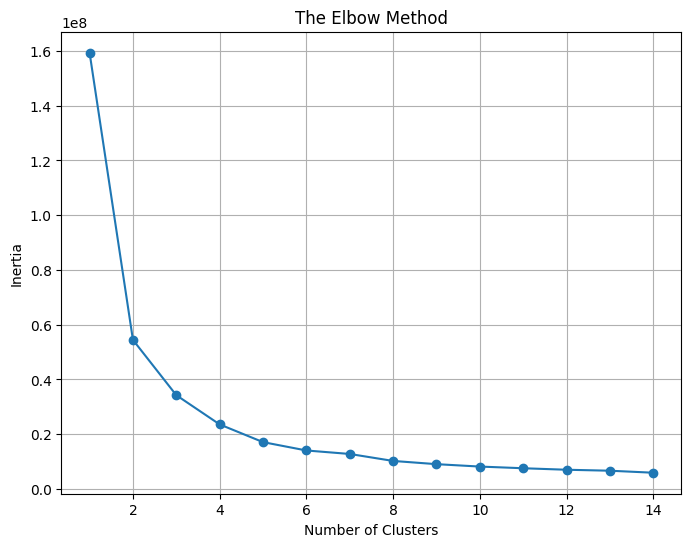

In [81]:
kmeans_optimization(df9[['Age', 'UtilizationRatio']], 15)

In [82]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(df9[['Age_T', 'UtilizationRatio_T']])
df9['AgeRatioCluster'] = kmeans.labels_

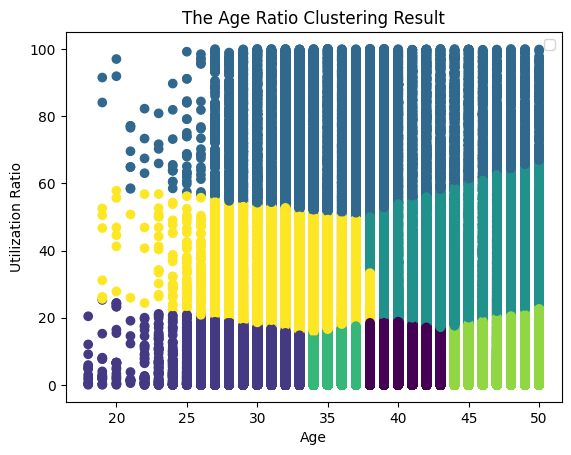

In [83]:
plt.scatter(df9['Age'], df9['UtilizationRatio'], c=df9['AgeRatioCluster'])
plt.title('The Age Ratio Clustering Result')
plt.xlabel('Age')
plt.ylabel('Utilization Ratio')
plt.legend()
plt.show()

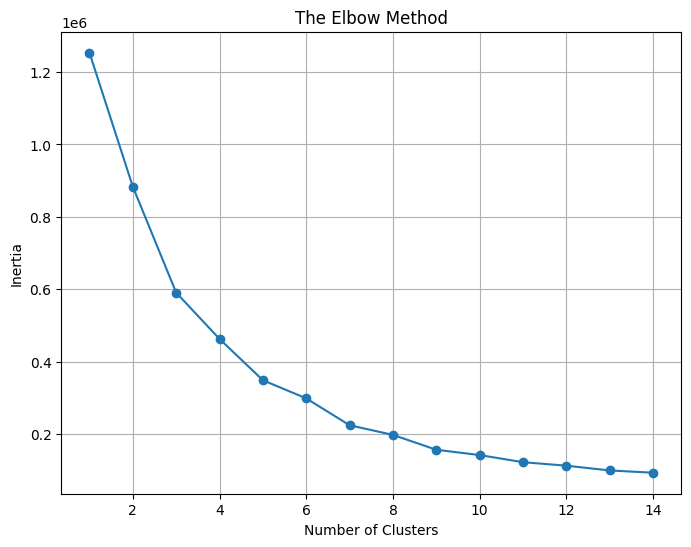

In [84]:
kmeans_optimization(df9[['CustAccountBalance_T', 'TransactionAmount_T']], 15)

In [85]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(df9[['CustAccountBalance_T', 'TransactionAmount_T']])
df9['BalanceTransactionCluster'] = kmeans.labels_

In [86]:
df9['BalanceTransactionCluster'].value_counts()

BalanceTransactionCluster
1    572829
0     36267
4     11784
5      4205
6       943
3       632
2        95
Name: count, dtype: int64

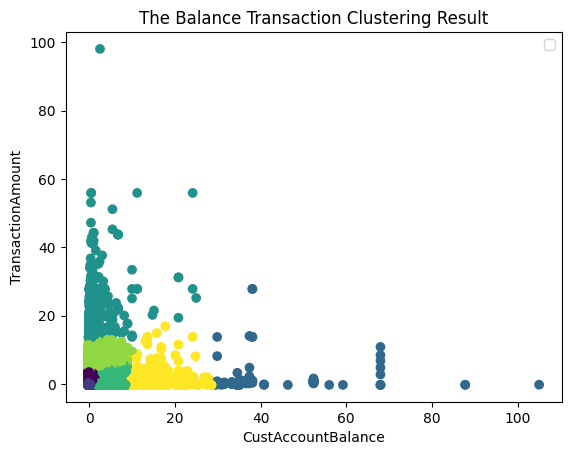

In [87]:
plt.scatter(df9['CustAccountBalance_T'], df9['TransactionAmount_T'], c=df9['BalanceTransactionCluster'])
plt.title('The Balance Transaction Clustering Result')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount')
plt.legend()
plt.show()

In [88]:
df9.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionTime',
       'TransactionAmount', 'Age', 'UtilizationRatio', 'TransactionMonth',
       'CustGender_T', 'CustAccountBalance_T', 'TransactionTime_T',
       'TransactionAmount_T', 'Age_T', 'UtilizationRatio_T',
       'TransactionMonth_T', 'AgeRatioCluster', 'BalanceTransactionCluster'],
      dtype='object')

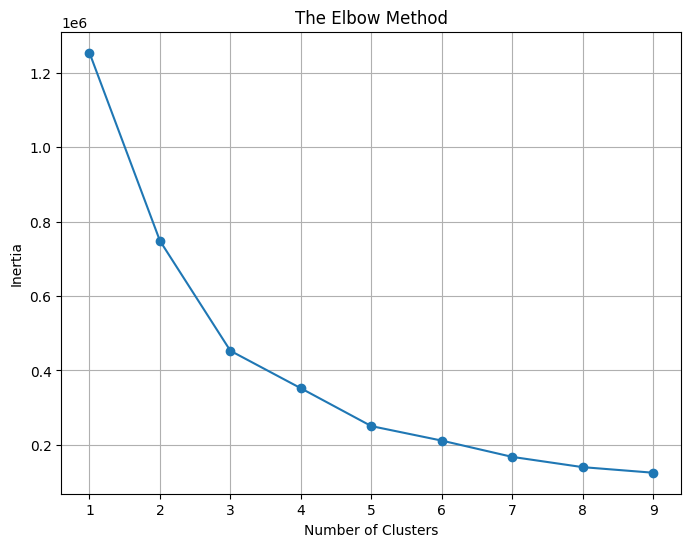

In [89]:
kmeans_optimization(df9[['UtilizationRatio_T', 'TransactionAmount_T']], 10)

In [90]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df9[['UtilizationRatio_T', 'TransactionAmount_T']])
df9['GenderTransactionCluster'] = kmeans.labels_

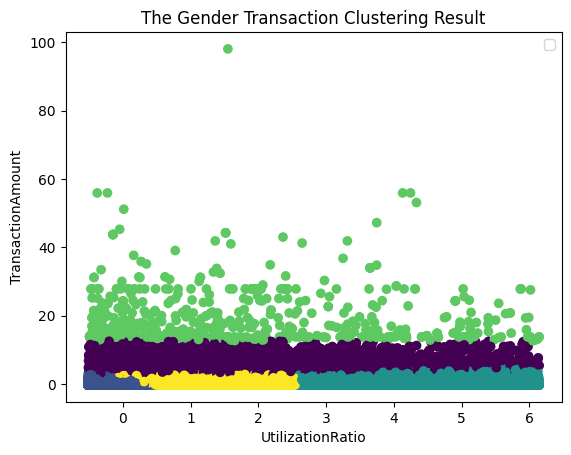

In [91]:
plt.scatter(df9['UtilizationRatio_T'], df9['TransactionAmount_T'], c=df9['GenderTransactionCluster'])
plt.title('The Gender Transaction Clustering Result')
plt.xlabel('UtilizationRatio')
plt.ylabel('TransactionAmount')
plt.legend()
plt.show()

In [92]:
df9.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionTime',
       'TransactionAmount', 'Age', 'UtilizationRatio', 'TransactionMonth',
       'CustGender_T', 'CustAccountBalance_T', 'TransactionTime_T',
       'TransactionAmount_T', 'Age_T', 'UtilizationRatio_T',
       'TransactionMonth_T', 'AgeRatioCluster', 'BalanceTransactionCluster',
       'GenderTransactionCluster'],
      dtype='object')

In [93]:
df9.to_csv('../data/bank_transactions_cleaned.csv', index=False)

In [94]:
df9

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount,Age,UtilizationRatio,TransactionMonth,CustGender_T,CustAccountBalance_T,TransactionTime_T,TransactionAmount_T,Age_T,UtilizationRatio_T,TransactionMonth_T,AgeRatioCluster,BalanceTransactionCluster,GenderTransactionCluster
0,0,JAMSHEDPUR,17819.05,143207,25.0,30,0.140,2,-1.547942,-0.187539,-0.285589,-0.317672,-1.349951,-0.503925,-2.026583,1,1,1
2,0,MUMBAI,17874.44,142712,459.0,28,2.568,2,-1.547942,-0.187404,-0.295173,-0.195611,-1.724973,-0.342336,-2.026583,1,1,1
4,0,NAVI MUMBAI,6714.43,181156,1762.5,36,26.249,2,-1.547942,-0.214610,0.449184,0.170994,-0.224885,1.233690,-2.026583,6,1,4
6,0,MUMBAI,973.46,173806,566.0,32,58.143,2,-1.547942,-0.228605,0.306873,-0.165518,-0.974929,3.356311,-2.026583,2,1,2
7,1,MUMBAI,95075.54,170537,148.0,42,0.156,2,0.646019,0.000797,0.243578,-0.283079,0.900182,-0.502861,-2.026583,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,1,NEW DELHI,7635.19,184824,799.0,34,10.465,9,0.646019,-0.212365,0.520205,-0.099987,-0.599907,0.183228,0.629080,4,1,1
1048563,1,NASHIK,27311.42,183734,460.0,32,1.684,9,0.646019,-0.164398,0.499100,-0.195330,-0.974929,-0.401169,0.629080,1,1,1
1048564,1,HYDERABAD,221757.06,183313,770.0,35,0.347,9,0.646019,0.309621,0.490949,-0.108143,-0.412396,-0.490149,0.629080,4,1,1
1048565,1,VISAKHAPATNAM,10117.87,184706,1000.0,46,9.884,9,0.646019,-0.206313,0.517920,-0.043456,1.650226,0.144561,0.629080,5,1,1
